In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
from scipy.stats import skew
import os
os.chdir("C:\\Users\\tamil\\OneDrive\\Documents\\Python Directory")
folder = "Medium/"

In [79]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.data

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df["TARGET"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

# Log Transformation

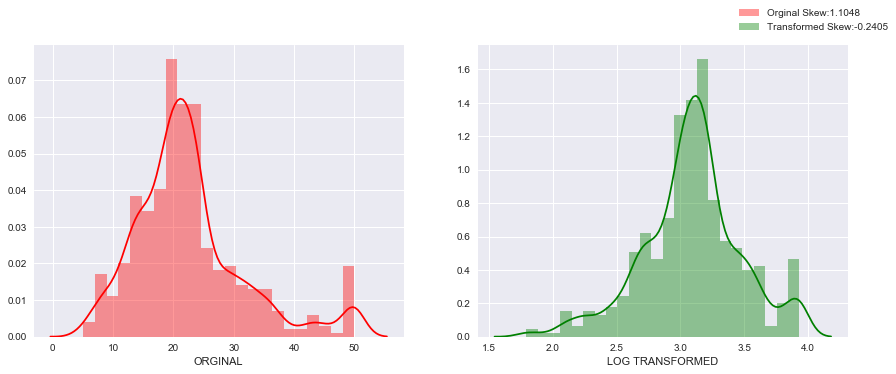

In [80]:
log_target = np.log1p(df["TARGET"])
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(df["TARGET"], label= "Orginal Skew:{0}".format(np.round(skew(df["TARGET"]),4)), color="r", ax=ax[0], axlabel="ORGINAL")
sns.distplot(log_target, label= "Transformed Skew:{0}".format(np.round(skew(log_target),4)), color="g", ax=ax[1], axlabel="LOG TRANSFORMED")
fig.legend()
plt.savefig(folder+'Log.png', bbox_inches='tight')
# plt.show()

# Square Root Transformation

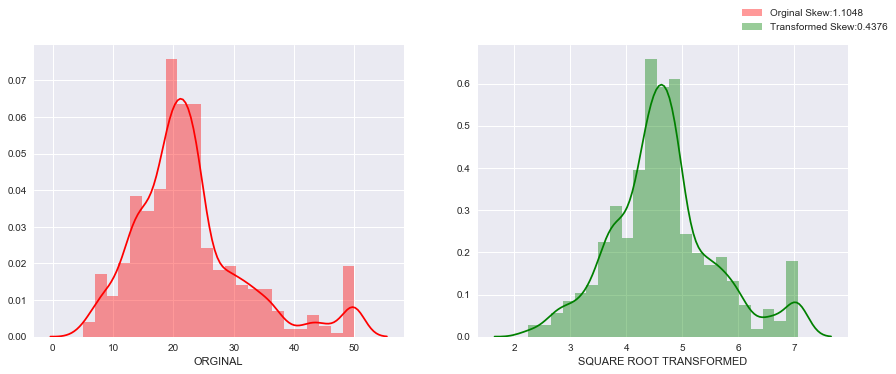

In [86]:
sqrrt_target = df["TARGET"]**(1/2)
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(df["TARGET"], label= "Orginal Skew:{0}".format(np.round(skew(df["TARGET"]),4)), color="r", ax=ax[0], axlabel="ORGINAL")
sns.distplot(sqrrt_target, label= "Transformed Skew:{0}".format(np.round(skew(sqrrt_target),4)), color="g", ax=ax[1], axlabel="SQUARE ROOT TRANSFORMED")
fig.legend()
plt.savefig(folder+'SQRT.png', bbox_inches='tight')
# plt.show()

# Reciprocal Transformation

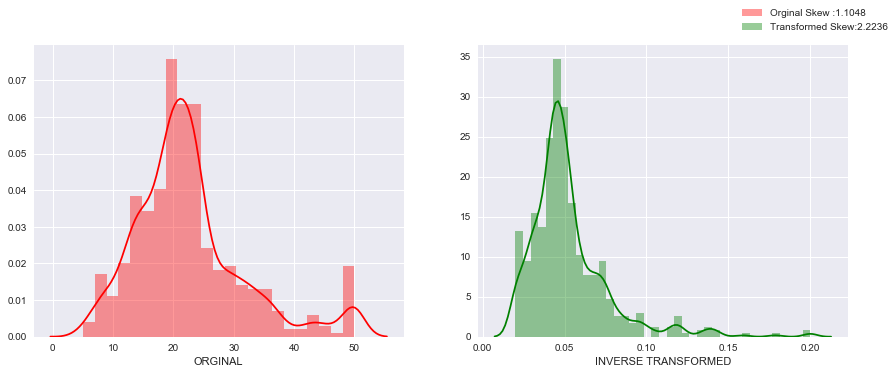

In [83]:
re_target = 1/df["TARGET"]
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(df["TARGET"], label= "Orginal Skew :{0}".format(np.round(skew(df["TARGET"]),4)), color="r", ax=ax[0], axlabel="ORGINAL")
sns.distplot(re_target, label= "Transformed Skew:{0}".format(np.round(skew(re_target),4)), color="g", ax=ax[1], axlabel="INVERSE TRANSFORMED")
fig.legend()
plt.savefig(folder+'re.png', bbox_inches='tight')
# plt.show()

# Box-cox Transformation

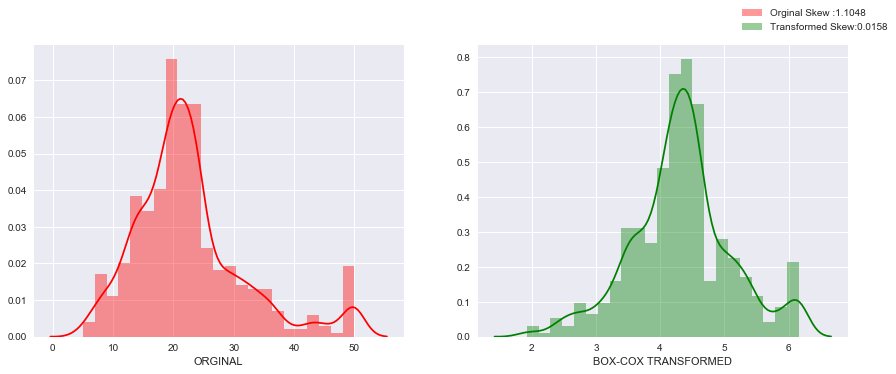

In [84]:
from scipy.stats import boxcox

bcx_target, lam = boxcox(df["TARGET"])

plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(df["TARGET"], label= "Orginal Skew :{0}".format(np.round(skew(df["TARGET"]),4)), color="r", ax=ax[0], axlabel="ORGINAL")
sns.distplot(bcx_target, label= "Transformed Skew:{0}".format(np.round(skew(bcx_target),4)), color="g", ax=ax[1], axlabel="BOX-COX TRANSFORMED")
fig.legend()
plt.savefig(folder+'bcx.png', bbox_inches='tight')
# plt.show()

# Yeo-Johnson Transformation

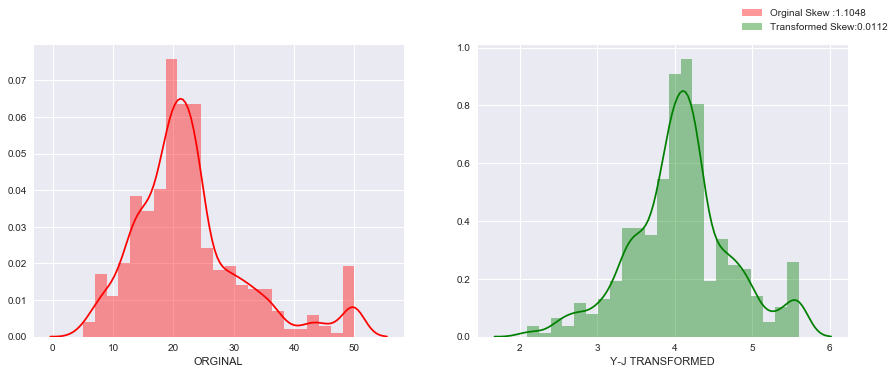

In [85]:
from scipy.stats import yeojohnson

yf_target, lam = yeojohnson(df["TARGET"])

plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(df["TARGET"], label= "Orginal Skew :{0}".format(np.round(skew(df["TARGET"]),4)), color="r", ax=ax[0], axlabel="ORGINAL")
sns.distplot(yf_target, label= "Transformed Skew:{0}".format(np.round(skew(yf_target),4)), color="g", ax=ax[1], axlabel="Y-J TRANSFORMED")
fig.legend()
plt.savefig(folder+'yj.png', bbox_inches='tight')
# plt.show()